In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [2]:
# Veri setlerini yükleme
train_data = pd.read_csv('train.csv')  # Eğitim veri seti
test_data = pd.read_csv('test.csv')    # Test veri seti

# Veri setinin boyutlarını kontrol etme
print("Eğitim Veri Seti Boyutu:", train_data.shape)
print("Test Veri Seti Boyutu:", test_data.shape)

# İlk 5 satırı gösterme
train_data.head()


Eğitim Veri Seti Boyutu: (42000, 785)
Test Veri Seti Boyutu: (28000, 784)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


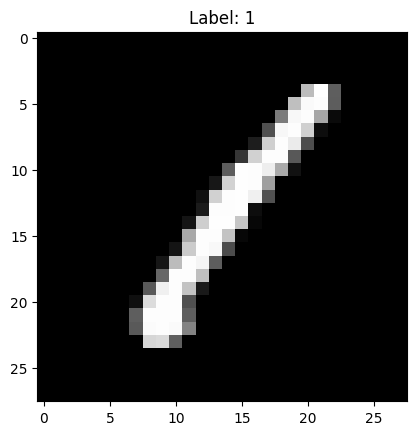

In [3]:
# İlk örneği görselleştirme
plt.imshow(train_data.iloc[0, 1:].values.reshape(28, 28), cmap='gray')
plt.title(f"Label: {train_data.iloc[0, 0]}")
plt.show()


In [4]:
# Özellikler ve etiketleri ayırma
X = train_data.iloc[:, 1:].values  # Görüntü verisi
y = train_data.iloc[:, 0].values   # Etiketler (rakamlar)

# Veriyi eğitim ve doğrulama setine ayırma
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Verileri normalize etme (0-255 arası değerleri 0-1 arası normalize etme)
X_train = X_train / 255.0
X_val = X_val / 255.0


In [5]:
# Logistic Regression modelini oluşturma
model = LogisticRegression(max_iter=1000, solver='lbfgs')

# Modeli eğitim verisiyle eğitme
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [6]:
# Doğrulama seti üzerinde tahmin yapma
y_pred = model.predict(X_val)

# Doğruluk oranını yazdırma
print("Doğruluk Skoru:", accuracy_score(y_val, y_pred))

# Sınıflandırma raporunu yazdırma
print("Sınıflandırma Raporu:\n", classification_report(y_val, y_pred))


Doğruluk Skoru: 0.9189285714285714
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.96      0.98      0.97       909
           2       0.91      0.89      0.90       846
           3       0.90      0.88      0.89       937
           4       0.92      0.93      0.93       839
           5       0.85      0.88      0.87       702
           6       0.93      0.96      0.94       785
           7       0.93      0.92      0.93       893
           8       0.90      0.88      0.89       835
           9       0.91      0.90      0.91       838

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400



In [7]:
# Test verisini normalize etme
test_data = test_data.values / 255.0

# Test verisi üzerinde tahmin yapma
test_predictions = model.predict(test_data)

# İlk 5 tahmin sonuçlarını yazdırma
print("İlk 5 Tahmin Sonucu:", test_predictions[:5])


İlk 5 Tahmin Sonucu: [2 0 9 7 3]


In [8]:
# Tahmin sonuçlarını Kaggle formatında kaydetme
submission = pd.DataFrame({'ImageId': range(1, len(test_predictions) + 1), 'Label': test_predictions})

# 'submission.csv' dosyasına kaydetme
submission.to_csv('submission.csv', index=False)

print("Tahmin sonuçları 'submission.csv' dosyasına kaydedildi.")


Tahmin sonuçları 'submission.csv' dosyasına kaydedildi.


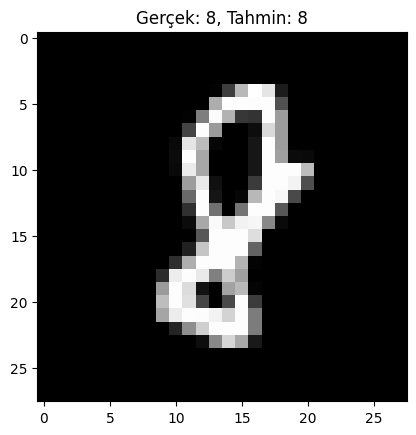

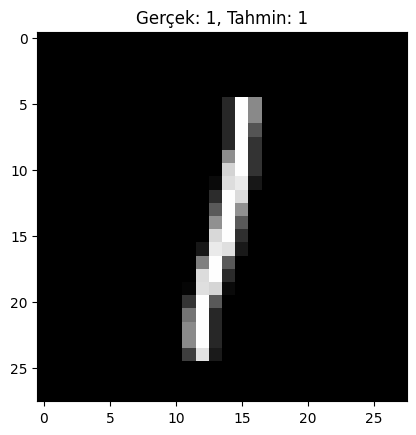

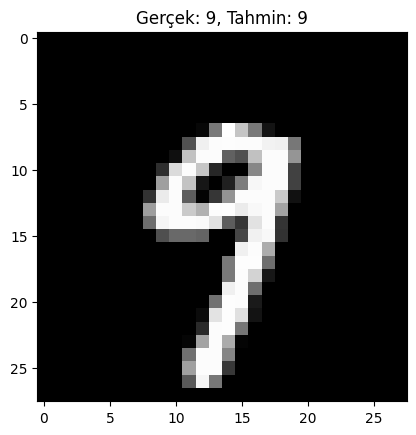

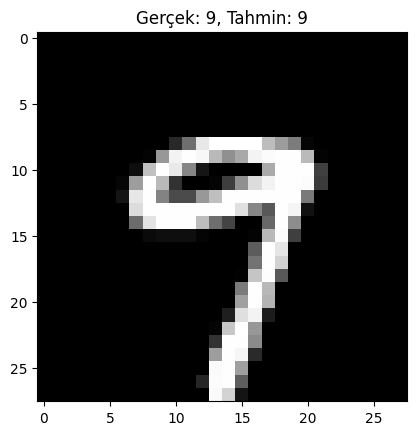

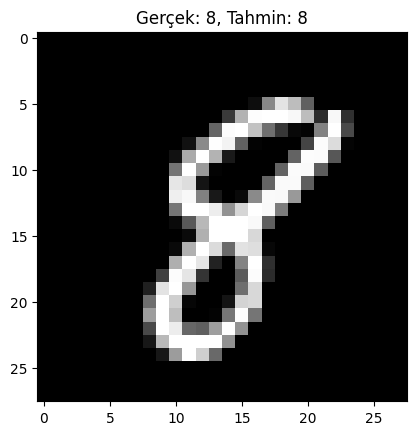

In [9]:
# İlk 5 doğru ve yanlış tahmin görselleştirme
for i in range(5):
    plt.imshow(X_val[i].reshape(28, 28), cmap='gray')
    plt.title(f"Gerçek: {y_val[i]}, Tahmin: {y_pred[i]}")
    plt.show()
